In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/yjzhu/SOLAR/MyPy")
import juanfit
from juanfit import gaussian


In [35]:
wvl = np.linspace(194,196,101)
data = np.array([gaussian(wvl,195.05,2,0.08) + gaussian(wvl,194.72,1,0.07) + \
        gaussian(wvl,195.15,0.3,0.08) + 1,
        gaussian(wvl,195.05,1.2,0.06) + gaussian(wvl,194.72,0.7,0.05) + \
        gaussian(wvl,195.15,0.5,0.06) + 0.5,
        gaussian(wvl,195.05,3,0.075) + gaussian(wvl,194.72,2,0.06) + \
        gaussian(wvl,195.15,1.2,0.075) + 0.7,
        gaussian(wvl,195.05,5,0.065) + gaussian(wvl,194.72,2,0.06) + \
        gaussian(wvl,195.15,3,0.065) + 0.2,
        gaussian(wvl,195.05,3.5,0.07) + gaussian(wvl,194.72,2.2,0.066) + \
        gaussian(wvl,195.15,1.4,0.07) + 1.2])
print(data.shape)
error_lvl = np.sqrt(data + 0.01)*0.1
data += np.random.normal(loc=0,scale=error_lvl)

(5, 101)


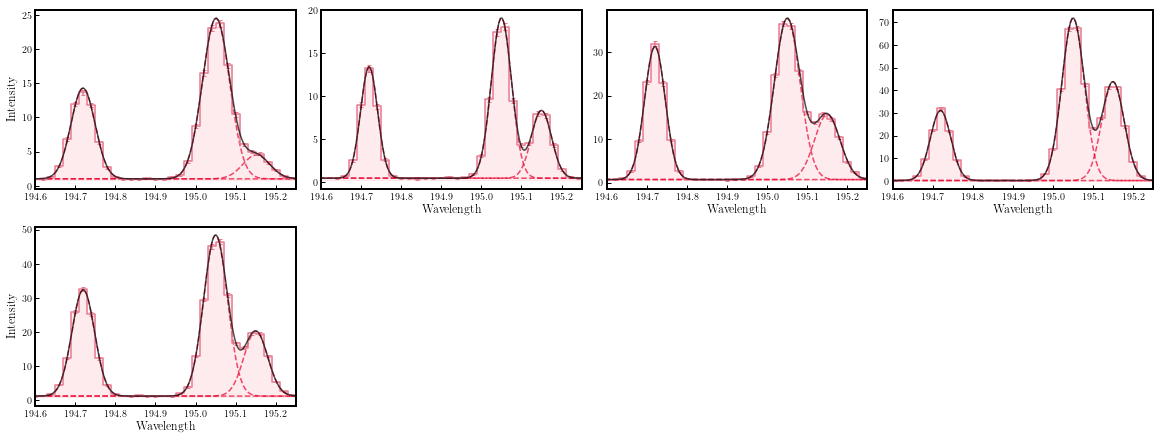

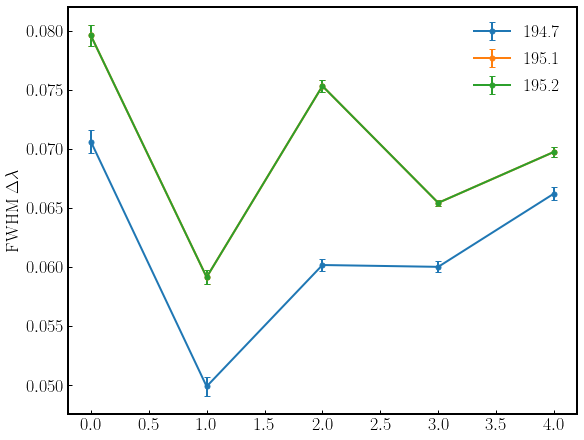

In [50]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitRow
fit_model = SpectrumFitRow(data=data,wvl=wvl,err=error_lvl,line_number=3,same_width=[False,True,True],
                            line_wvl_init=[194.7,195,195.1],int_max_init=[40,50,60],
                            fwhm_init=[0.1,0.1,0.1])
fit_model.run_lse()
fit_model.plot_fit(color_style="Red",xlim=(194.6,195.25))
fit_model.plot_variation()

In [42]:
fit_model.fwhm_fit

array([[0.07063523, 0.07961555, 0.07961555],
       [0.04989221, 0.05914401, 0.05914401],
       [0.06017635, 0.07533905, 0.07533905],
       [0.0600214 , 0.06544115, 0.06544115],
       [0.06622862, 0.06975906, 0.06975906]])

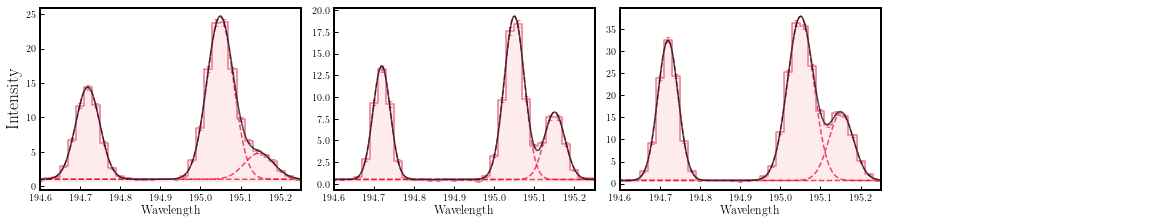

In [30]:
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitRow
fit_model = SpectrumFitRow(data=data,wvl=wvl,err=error_lvl,line_number=3,same_width=False,
                            line_wvl_init=[194.7,195,195.1],int_max_init=[10,15,5],
                            fwhm_init=[0.07,0.07,0.07])
fit_model.run_lse()
fit_model.plot_fit(color_style="Red",xlim=(194.6,195.25))

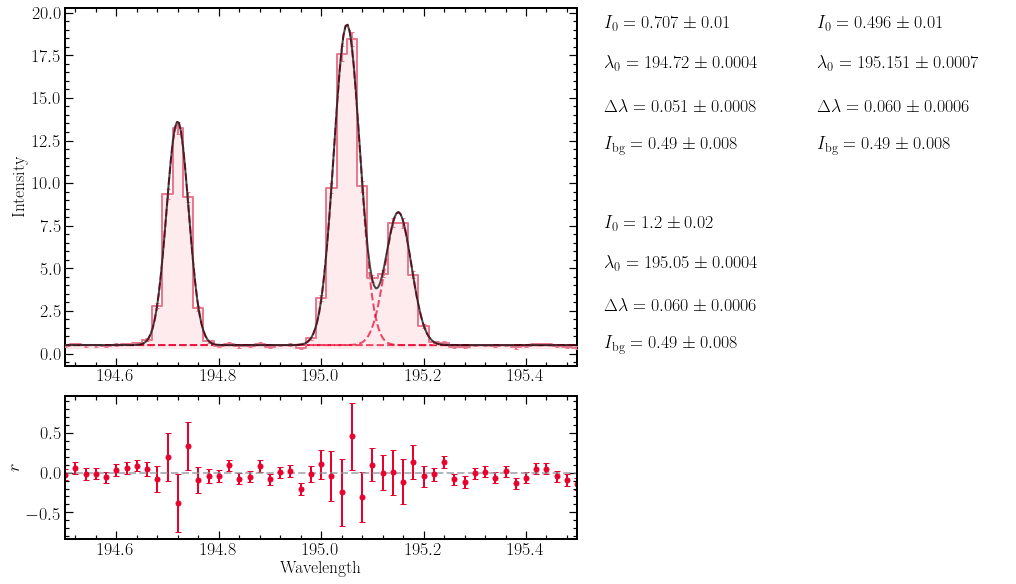

In [12]:
fit_model.plot_single(frame_index=1,xlim=(194.5,195.5))